https://github.com/dtrckd/simplon_datai_2020/blob/master/brief_6/brief.md

Découverte de l'apprentissage non-supervisé au travers de l'algorithme K-means.

    Qu'est ce que le clustering ?
Clustering fait partie de l'apprentissage non supervisé 
(Unsupervised Learning) qui consiste à ne disposer que de données d’entrée (X) et pas de variables de sortie correspondantes (y); les données ne sont pas étiquetées.

L’objectif du clustering est de séparer les données en groupes homogènes ayant des caractéristiques communes. Les champs d’application sont divers : segmentation client, segmenter une image, détection d'anomalie, Data Mining, clustering de documents...

    Est ce un probleme difficile ?
La détermination  de nombre de clusters optimals reste un problème de taille. Il n'est pas toujours facile  de trouver le nombre idéal de clusters simplement en visualisant graphiquement. Généralement les jeux de données ont plus de deux dimensions et il est donc difficile de visualiser le nuage de points et d’identifier rapidement le nombre de clusters optimal. 

    Pourquoi ?

Choisir un nombre de cluster K n’est pas forcément intuitif. 

Pour un même jeu de données, il n’existe pas un unique clustering possible. La difficulté résidera donc à choisir un nombre de cluster K qui permettra de mettre en lumière des patterns intéressants entre les données. 

La méthode la plus usuelle pour choisir le nombre de clusters est de lancer K-Means avec différentes valeurs de K et de calculer la variance des différents clusters.


    Quelles sont les métriques utilisées pour le clustering ?
Celles qui se basent l’évaluation de  la distance entre chaque point et les centroïdes. On peut noter les suivantes :
    metrics.homogeneity_score,
    metrics.completeness_score,
    silhouette_score.

    

    Homogeneity_score(labels_true, labels_pred)
Un résultat de clustring répond à une homogeneity si tous les clusters contiennent uniquement des données qui appartiennent à un seul cluster.
 cette mesure est indépendante des valeurs absolus des labels, la permutation des classe ou des valeurs des labels des clusters ne change pas du tout le score obtenu.
 Elle n'est pas symétrique, si on permute les labels_true et labels_pred, nous obtenons le  "completeness_score" qui est en général différent.
 
     Completeness_score(labels_true, labels_pred)
Un résultat de clustring répond à completeness si tous les éléments d'une même classe appartiennent au même cluster.
A linstar de Homogeneity_score, elle est indépendantedes valeurs absolus des labels et elle n'est pas symétrique. Interchanger les labels_true et labels_pred renvoit Homogeneity_score.

    Silhouette_score 
coefficient de silhouette se définit comme suit:(b - a) / max(a, b)
a: la moyenne des distances aux autres observations du même cluster (cad la moyenne intra-cluster).
b : la distance moyenne au cluster le plus proche. 

In [166]:
# Import some libraries

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 


from sklearn import metrics
 
# Import some data
digits = load_digits()


In [167]:
print(digits.data.shape)

(1797, 64)


In [168]:
# appication du kmeans algorithme, en clusters à 10

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape



(10, 64)

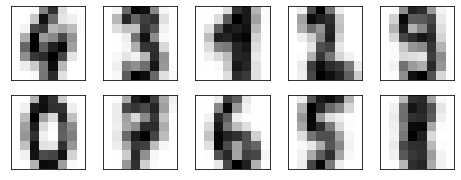

In [169]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)


In [170]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(digits.data)

In [171]:
from sklearn.metrics import accuracy_score
round(accuracy_score(digits.target, y_pred),3)


0.006

Le résultat de l'accuracy est très faible, elle n'est pas la mesure la plus adapter à utiliser directement dans manipulation de notre part. Nous faisons recours au preporcessing pour voir la différence.
Nous constatons qu'il y avait une légère amiloration mais cela reste médiocre, une évolution de 0.006 à 0.195.

In [172]:
#preporcessing with standarscaler
from sklearn.preprocessing import StandardScaler

In [173]:
data_SS = StandardScaler().fit_transform(digits.data)

In [174]:
y_pred_SS= KMeans(n_clusters=10, random_state=0).fit_predict(data_SS)

In [175]:
round(accuracy_score(digits.target, y_pred_SS),3)

0.195

In [176]:
#Nous allons utiliser les métriques suivantes :
    
def testMetrics (X, y):
    result = []
    clustering_metrics = [
            metrics.homogeneity_score,
            metrics.completeness_score,
            metrics.v_measure_score,
            metrics.adjusted_rand_score,
            metrics.adjusted_mutual_info_score,
        ]

    for cMetric in clustering_metrics :
            result.append(round(cMetric(X, y),3))
    return result

In [177]:
results = testMetrics (digits.target, y_pred)

In [178]:
#Silhouette Metric
labels = kmeans.labels_
results.append(round(metrics.silhouette_score(digits.data, labels, metric='euclidean'),3))


In [180]:
print(55 * '_')
print('homo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
formatter_result = ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
print(formatter_result.format(*results))
print(55 * '_')

_______________________________________________________
homo	compl	v-meas	ARI	AMI	silhouette
0.740	0.749	0.744	0.670	0.742	0.182
_______________________________________________________


In [181]:
# Réduction de dimension à 2 dimensions utilisation de la PCA seule
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
data_reduit = pca_model.fit_transform(digits.data)

In [182]:
data_reduit.shape

(1797, 2)

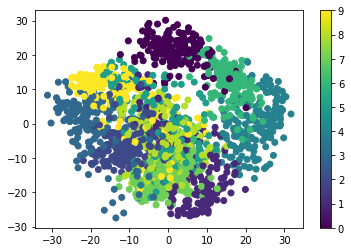

In [183]:
y = digits.target
plt.scatter(data_reduit[:,0],data_reduit[:,1], c=y)
plt.colorbar()

In [184]:
pca_model.components_.shape

(2, 64)

Chacun des axes correspond à une compasante principale et cette dernière représente une combinaison linéaire de 64 valeurs. Il est à noter qu'on est passé d'un dataset de (1797, 64) à (1797, 2).

In [185]:
# Réduction de dimension à 3 dimensions
from sklearn.decomposition import PCA
pca_model = PCA(n_components=3)
data_reduit3 = pca_model.fit_transform(digits.data)

In [186]:
from mpl_toolkits.mplot3d import Axes3D

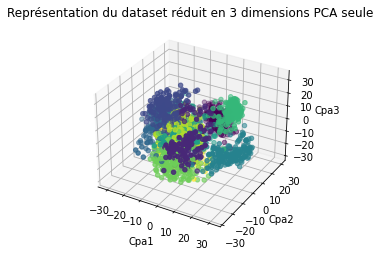

In [187]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_reduit3[:,0],data_reduit3[:,1], data_reduit3[:,2],c=y, marker='o')

ax.set_xlabel('Cpa1')
ax.set_ylabel('Cpa2')
ax.set_zlabel('Cpa3')
plt.title("Représentation du dataset réduit en 3 dimensions PCA seule")

plt.show()

In [188]:
# PCA2 + Kmeans

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(data_reduit)
kmeans.cluster_centers_.shape


(10, 2)

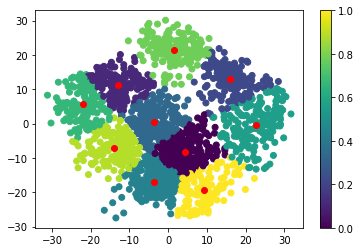

In [189]:
y = digits.target
plt.scatter(data_reduit[:,0],data_reduit[:,1], c=clusters)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c='r')
plt.colorbar()

In [190]:
#PCA3 + Kmeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters3 = kmeans.fit_predict(data_reduit3)
kmeans.cluster_centers_.shape


(10, 3)

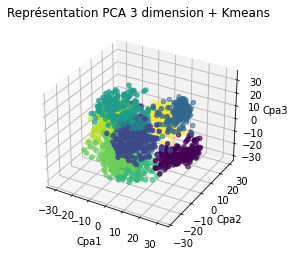

In [191]:


fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')

ax.scatter(data_reduit3[:,0],data_reduit3[:,1], data_reduit3[:,2],c=clusters3, marker='o')

ax.set_xlabel('Cpa1')
ax.set_ylabel('Cpa2')
ax.set_zlabel('Cpa3')
plt.title("Représentation PCA 3 dimension + Kmeans")

plt.show()

Réduction des dimensions : (Compression de données)
le but est de réduire le nombre de variable en conservant 95 % de la variance

In [192]:
# reduction des dimensions 64
pca_model64 = PCA(n_components=64)
data_reduit64 = pca_model64.fit_transform(digits.data)

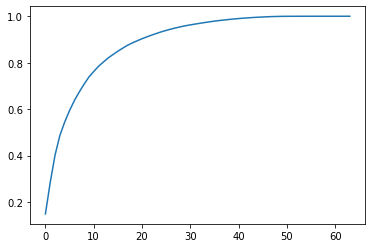

In [193]:
# Le pourcentage de variance préservé pour chaque composante
plt.plot(np.cumsum(pca_model64.explained_variance_ratio_))

In [194]:
# En fonction du graphe, On choisit de reduire les dimensions à 10
pca_model10 = PCA(n_components=10)
data_reduit10 = pca_model10.fit_transform(digits.data)

In [199]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters10 = kmeans.fit_predict(data_reduit10)
kmeans.cluster_centers_.shape



(10, 10)

In [207]:
labels = kmeans.labels_
results3 = testMetrics (kmeans.labels_, y_pred)

#Silhouette Metric

results3.append(round(metrics.silhouette_score(data_reduit10, labels, metric='euclidean'),3))
print(55 * '_')
print('homo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
formatter_result = ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
print(formatter_result.format(*results3))
print(55 * '_')


_______________________________________________________
homo	compl	v-meas	ARI	AMI	silhouette
0.936	0.937	0.936	0.936	0.936	0.264
_______________________________________________________


La réduction de dimension avant de faire recours au clusting améliore les résulats des différentes métriques